In [2]:
import math
from typing import Callable, Tuple, List
import numpy as np
import matplotlib.pyplot as plt

# Under construction
<font color="red"><b>Author: Wim R.M. Cardoen (wcardoen@gmail.com)</b></font><br>
If you stumble by chance on this website and find errors, have comments/suggestions, please send 
an email to the author! Thanks.<br>

# Note on convex functions

## Topics to be discussed:
* What is convexity?
* How to determine convexity & properties
* Example
* Further reading

## Convexity
- a function $f(\mathbf{x})$ is <font color="green"><b>convex</b></font> if and only if:<br>
$\begin{equation}
      f(\lambda \mathbf{x_1} + (1-\lambda) \mathbf{x_2}) <= \lambda f(\mathbf{x_1}) + (1-\lambda) f(\mathbf{x_2})
\end{equation}$<br>
  where:<br>
    + $\lambda \in [0,1]$
    + $\mathbf{x_1}, \mathbf{x_2} \in \mathbb{R}^d$

- This can be easily visualized in 1D:<br>
  $\begin{equation}
      f(\lambda x_1 + (1-\lambda) x_2) <= \lambda f(x_1) + (1-\lambda) f(x_2)
\end{equation}$

i.e. when you take two points ($x_1,x_2$) belonging to a convex set, then<br> all function values $f(y)$ for the points $y$ $\in (x_1,x_2)$ are<br>**below the straight line** spanned by the points $f(x_1)$ and $f(x_2)$.


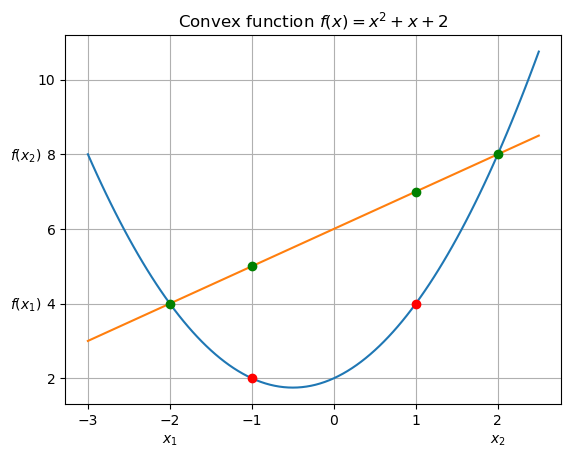

In [51]:
def f(x):
    return x**2 + x +2
x = np.linspace(-3,2.5,100)
p1 = -2.0, f(-2.0)
p2 =  2.0, f(2.0)
m = (p2[1]-p1[1])/(p2[0]-p1[0])
q = p1[1] - m*p1[0]
w = np.linspace(-3,2.5,101)
plt.plot(x, f(x))
plt.plot(w, m*w+q)
plt.plot(-1.0, f(-1.0),'or')
plt.plot( 1.0, f(1.0), 'or')
plt.plot(-1.0, -1.0*m +q , 'og')
plt.plot( 1.0, 1.0*m +q , 'og')
plt.plot(p1[0], p1[1],'og')
plt.plot(p2[0], p2[1],'og')


plt.title(r"Convex function $f(x)=x^2+x+2$")
plt.text(-2.1, 0.25, r"$x_1$")
plt.text(1.9, 0.25, r"$x_2$")
plt.text(-3.95, 3.85, r"$f(x_1)$")
plt.text(-3.95, 7.85, r"$f(x_2)$")
plt.grid(True)
plt.show()

Further:
- If $f$ is twice continuously differentiable ($C^{2}$) over an open convex set $\mathcal{D}$,<br>
  then $f$ is **convex** over $\mathcal{D}$ iff $\nabla^2 f(x) $ is **positive semi-definite** for any $x$ in $\mathcal{D}$.
- If a function $f$ is convex, its **local minimum** is the **global minimum**.<br>
  <font color="green"><b>Thus, convexity makes an optimization problem easy!</b></font>
- In deep learning most problems are **NOT** convex. We have the chance to end up in a <font color="red"><b>local mininum</b></font>.
  + <font color="red"><b>From a mathematical perspective this is a serious issue.</b></font>
  + DL community: as long as people are able to generalize/learn, things are "fine". 

## Example
$
f(x,y):= x^2 + 2xy + 3y^2 + 2x -3y + e^x$

The gradient is given by:<br>
$\nabla f := \begin{bmatrix} 
               2x + 2y + 2 + e^x \\
               2x + 6y -3
            \end{bmatrix}$

The Hessian is given by:<br>
$\nabla^2 f := \begin{bmatrix} 2 + e^x  &  2 \\
                               2        &  6 
               \end{bmatrix}$  

If we set $e^x:=\alpha > 0$, we get:<br>
$\nabla^2 f := \begin{bmatrix} 2 + \alpha  &  2 \\
                               2        &  6 
               \end{bmatrix}$  


We will prove that $\nabla^2 f(x,y)$ is positive semidefinite over $\mathbb{R}^2$, i.e.,
the **eigenvalues** of $\nabla^2 f(x,y) $ are positive.<br>

- To obtain the eigenvalues of $\nabla^2 f(x,y)$ , we need to solve the following characteristic equation for $\lambda$:<br>
  $ (2 + \alpha - \lambda)(6-\lambda) -4 = 0$
- After a simple rearrangement, we obtain the following roots:<br>
  $ \lambda_{1,2} = \frac{1}{2}\Big[(8+\alpha)\pm \sqrt{(\alpha-4)^2 +16} \Big]$

- Because $\alpha\ge 0$<br>
  + $ \lambda_1 = \frac{1}{2}\Big[(8+\alpha)+ \sqrt{(\alpha-4)^2 +16} \Big]$ is strictly positive
  + $(8+\alpha)^2 > (\alpha-4)^2 +16$ therefore,<br>
    $ \lambda_2 = \frac{1}{2}\Big[(8+\alpha)- \sqrt{(\alpha-4)^2 +16} \Big]$ is strictly positive
    
- Therefore, the function $f(x,y)$ is convex over $\mathbb{R}^2$.

### Locating the minimum using gradient descent

In [93]:
def f(x: float,y: float) -> float:
    """
    Computes the mathematical expression:
        f(x,y):= x**2 + 2*x*y + 3*y**2 + 2*x - 3*y + exp(x)

    Parameters:
    x (float): The first coord.
    y (float): The second coord.

    Returns:
    float: The result of the evaluated expression.
    """
    return x**2 + 2*x*y +3*y**2 +2*x -3*y + math.exp(x)

def fder(x: float, y:float) -> Tuple[float, float]:
    """
    Computes the partial derivatives of a specific multivariable function with respect to x and y.

    The function returns a tuple representing the gradient vector:
        (∂f/∂x, ∂f/∂y)
    where:
        ∂f/∂x = 2*x + 2*y + 2 + exp(x)
        ∂f/∂y = 2*x + 6*y - 3
    
    Parameters:
        x (float): The x-coordinate input.
        y (float): The y-coordinate input.

    Returns:
    Tuple[float, float]: A tuple containing the partial derivatives with respect to x and y.
    """
    return (2*x + 2*y+2 + math.exp(x), 2*x + 6*y -3)

def findmin( f: Callable[[float, float], float],
             fder: Callable[[float, float], Tuple[float, float]],
             start: Tuple[float, float],
             ALPHA: float = 0.005,
             CONV: float = 1.0E-10,
             INTER: int = 50
           ) -> Tuple[List[List[float]], List[float], List[List[float]]]:
    
    """
    Performs gradient descent to find the minimum of a two-variable function.

    Parameters:
      f (Callable[[float, float], float]): The function to minimize. It should take two floats (x, y) and return a float.
      fder (Callable[[float, float], Tuple[float, float]]): The gradient (partial derivatives) of the function.
      start (Tuple[float, float]): The starting coordinates (x, y) for the descent.
      ALPHA (float, optional): The learning rate or step size. Default is 0.005.
      CONV (float, optional): The convergence threshold for the change in function value. Default is 1.0E-10.
      INTER (int, optional): The interval at which to print progress updates. Default is 50.

    Returns:
      Tuple[List[List[float]], List[float], List[List[float]]]: 
        - A list of coordinate pairs visited during descent.
        - A list of function values at those coordinates.
        - A list of gradient vectors at those coordinates.
    """
    lstCoord, lstFunc, lstFuncder = [], [], []
    it, isConverged = 0, False
    
    xs, ys = start
    f_old = f(xs,ys) 
    fder_x, fder_y = fder(xs,ys)
    
    lstCoord.append([xs,ys])
    lstFunc.append(f_old)
    lstFuncder.append([fder_x, fder_y])
    print(f"Iter:{it:4d} x:{xs:12.8f}  y:{ys:12.8f} f:{f_old:14.10f}")
    
    while(not(isConverged)):

       # Update coord, fval, fder
       it +=1
       xs -= ALPHA*fder_x
       ys -= ALPHA*fder_y
       f_new = f(xs,ys)
       fder_x, fder_y = fder(xs,ys)

       # Add the new points to list
       lstCoord.append([xs,ys])
       lstFunc.append(f_new)
       lstFuncder.append([fder_x, fder_y])
        
       if it%INTER == 0 :
           print(f"Iter:{it:4d} x:{xs:12.8f}  y:{ys:12.8f} f:{f_new:14.10f}") 
       if math.fabs(f_new-f_old)<CONV:
           isConverged = True
           print(f"Iter:{it:4d} x:{xs:12.8f}  y:{ys:12.8f} f:{f_old:14.10f} => CONVERGED")
           return (lstCoord, lstFunc, lstFuncder)
       f_old = f_new    

In [94]:
# Find. the minimum
(lstCoord, lstFunc, lstFuncder) = findmin(f,fder,(0.,0))
coordArr = np.array(lstCoord)
fvalArr = np.array(lstFunc)
fderArr = np.array(lstFuncder)

# Extract a slice of the Coord, Fval and the Gradients
SZ = 25
coordRArr = np.vstack((coordArr[0::SZ,:], coordArr[-1,:]))
fvalRArr = np.hstack((fvalArr[0::SZ], fvalArr[-1]))
fderRArr = np.vstack((fderArr[0::SZ,:], fderArr[-1,:]))

Iter:   0 x:  0.00000000  y:  0.00000000 f:  1.0000000000
Iter:  50 x: -0.65311069  y:  0.49940704 f: -1.7615785145
Iter: 100 x: -1.12389166  y:  0.74859643 f: -2.9069203817
Iter: 150 x: -1.45862190  y:  0.90294827 f: -3.4541277350
Iter: 200 x: -1.69767986  y:  1.00787209 f: -3.7284210623
Iter: 250 x: -1.86945268  y:  1.08183410 f: -3.8691265533
Iter: 300 x: -1.99346754  y:  1.13477446 f: -3.9422562562
Iter: 350 x: -2.08330223  y:  1.17295088 f: -3.9805716419
Iter: 400 x: -2.14852659  y:  1.20059505 f: -4.0007512647
Iter: 450 x: -2.19595745  y:  1.22066365 f: -4.0114163687
Iter: 500 x: -2.23048683  y:  1.23525693 f: -4.0170664353
Iter: 550 x: -2.25564343  y:  1.24588068 f: -4.0200646643
Iter: 600 x: -2.27398147  y:  1.25362071 f: -4.0216575566
Iter: 650 x: -2.28735432  y:  1.25926288 f: -4.0225045337
Iter: 700 x: -2.29710910  y:  1.26337740 f: -4.0229551613
Iter: 750 x: -2.30422613  y:  1.26637874 f: -4.0231950180
Iter: 800 x: -2.30941945  y:  1.26856852 f: -4.0233227272
Iter: 850 x: -

### Plotting the path to the minimum (including the gradient vector)

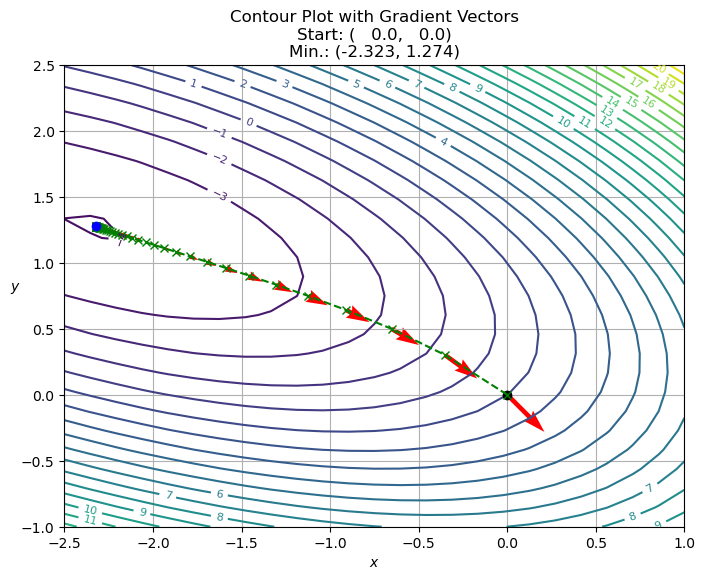

In [109]:
(XMIN, XMAX) = -2.5, 1.0
(YMIN, YMAX) = -1.0, 2.5
x = np.linspace(XMIN, XMAX, 25)
y = np.linspace(YMIN, YMAX, 25)
X, Y = np.meshgrid(x, y)
Z = X**2 + 2*X*Y + 3*Y**2 + 2*X -3*Y + np.exp(X)

# Compute gradients
dZ_dx, dZ_dy = np.gradient(Z, x, y)

# Create the contour plot
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=25, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Overlay gradient vectors
plt.quiver(coordRArr[:,0], coordRArr[:,1], fderRArr[:,0], fderRArr[:,1], color='red', scale=50)

plt.plot(coordRArr[0,0],coordRArr[0,1],'ok')
plt.plot(coordRArr[:,0],coordRArr[:,1],'x--g')
plt.plot(coordRArr[-1,0],coordRArr[-1,1],'ob')

plt.title(f"Contour Plot with Gradient Vectors\n" + f"Start: ({coordRArr[0,0]:6.4},{coordRArr[0,1]:6.4})\n" +
          f"Min.: ({coordRArr[-1,0]:6.4},{coordRArr[-1,1]:6.4})")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$",rotation=0)
plt.axis([XMIN,XMAX,YMIN,YMAX])
plt.grid(True)
plt.show()

Note: from the above plot we can see that:
- the gradient is the biggest in the beginning and goes to $0$ at the minimum
- the "marching" direction is **opposite** to the direction of the gradient.
 